In [1]:
# Download BurST-ADMA
import urllib.request
urllib.request.urlretrieve("https://raw.githubusercontent.com/ahzam-a/BurST-ADMA/main/BurST-ADMA_v0.1.csv", "imported_data/BurST-ADMA_v0.1.csv")

('imported_data/BurST-ADMA_v0.1.csv',
 <http.client.HTTPMessage at 0x7ea3ca5f8190>)

In [2]:

MAX_CLUSTERS = 10
OUTPUT_EACH_CLUSTER = False
import math
import pandas
with open("imported_data/BurST-ADMA_v0.1.csv", 'r') as csvfile:
    df = pandas.read_csv(csvfile)
 # The names of all the columns in the data.

distance_columns = ['x', 'y']


y = df['label']
X_df = df.drop(['label'], axis = 1)
X_df.head

X = X_df[distance_columns] 
print(X)
print(df.columns.values)



                 x          y
0       145.098864 -37.862205
1       145.130795 -37.859405
2       145.107735 -37.854756
3       145.112993 -37.855362
4       109.316641 -37.842177
...            ...        ...
207310  145.126904 -37.851541
207311  145.119840 -37.851621
207312  145.118262 -37.850294
207313  145.120179 -37.841157
207314  145.109522 -37.847132

[207315 rows x 2 columns]
['timestep' 'id' 'x' 'y' 'heading' 'speed' 'acceleration' 'label']


biggest timestep: 308
min timestep: 5


  0%|          | 0/1000 [00:00<?, ?it/s]Exception ignored on calling ctypes callback function: <function _ThreadpoolInfo._find_modules_with_dl_iterate_phdr.<locals>.match_module_callback at 0x7f101fac6950>
Traceback (most recent call last):
  File "/home/fatihyuce/miniconda3/envs/egcnoi_env/lib/python3.10/site-packages/threadpoolctl.py", line 400, in match_module_callback
    self._make_module_from_path(filepath)
  File "/home/fatihyuce/miniconda3/envs/egcnoi_env/lib/python3.10/site-packages/threadpoolctl.py", line 515, in _make_module_from_path
    module = module_class(filepath, prefix, user_api, internal_api)
  File "/home/fatihyuce/miniconda3/envs/egcnoi_env/lib/python3.10/site-packages/threadpoolctl.py", line 606, in __init__
    self.version = self.get_version()
  File "/home/fatihyuce/miniconda3/envs/egcnoi_env/lib/python3.10/site-packages/threadpoolctl.py", line 646, in get_version
    config = get_config().split()
AttributeError: 'NoneType' object has no attribute 'split'
Exce

968.0


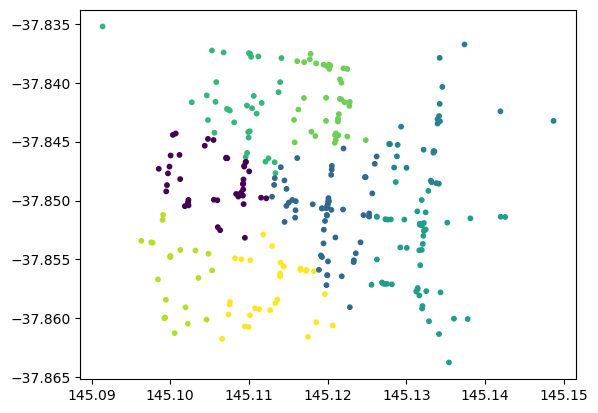

Exception ignored on calling ctypes callback function: <function _ThreadpoolInfo._find_modules_with_dl_iterate_phdr.<locals>.match_module_callback at 0x7f101cb04e50>
Traceback (most recent call last):
  File "/home/fatihyuce/miniconda3/envs/egcnoi_env/lib/python3.10/site-packages/threadpoolctl.py", line 400, in match_module_callback
    self._make_module_from_path(filepath)
  File "/home/fatihyuce/miniconda3/envs/egcnoi_env/lib/python3.10/site-packages/threadpoolctl.py", line 515, in _make_module_from_path
    module = module_class(filepath, prefix, user_api, internal_api)
  File "/home/fatihyuce/miniconda3/envs/egcnoi_env/lib/python3.10/site-packages/threadpoolctl.py", line 606, in __init__
    self.version = self.get_version()
  File "/home/fatihyuce/miniconda3/envs/egcnoi_env/lib/python3.10/site-packages/threadpoolctl.py", line 646, in get_version
    config = get_config().split()
AttributeError: 'NoneType' object has no attribute 'split'
Exception ignored on calling ctypes callback

max_size:308, max_size_ts:968.0


In [3]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from matplotlib.widgets import SpanSelector
from tqdm import tqdm

import ipywidgets as widgets
from ipywidgets import interact, interact_manual

import os
try:
    os.remove("data/burst_adma_with_clusters_in_time.csv")
except:
    pass
plt.ion()

print(f"biggest timestep: {df.groupby(['timestep'])['timestep'].count().max()}") 
print(f"min timestep: {df.groupby(['timestep'])['timestep'].count().min()}") 
gb = df.groupby(['timestep'])
headers_put = False
max_size_ts = 0
max_size = 0
for name, group in tqdm(gb):
    l = len(group)
    # print(f"{name} timestep")
    n_cl = min(int((l/3)+1),MAX_CLUSTERS)
    # print(n_cl)
    kmeans = KMeans(n_clusters=n_cl, random_state=0, n_init='auto')
    #build the model, based on X with the number of clusters defined above
    kmeans.fit(group[distance_columns])
    #now we're going to find clusters in the randomly generated dataset
    predict = kmeans.predict(group[distance_columns])
    group.insert(0,'cls', predict)
    if OUTPUT_EACH_CLUSTER:
        group.to_csv(f"data/burst_adma_with_clusters_in_time_{name}.csv")
    group.to_csv(f"data/burst_adma_with_clusters_in_time.csv", mode='a', header=not headers_put)
    headers_put=True
    if max_size < l :
        max_size = l
        max_size_ts = name
    if name == 968: #name > 989  or 
        print(name)
        tmp = group[group['x'] > 120]
        predict_tmp = kmeans.predict(tmp[distance_columns])
        plt.scatter(tmp['x'], tmp['y'], c=predict_tmp, s=10)
        plt.show()
print (f"max_size:{max_size}, max_size_ts:{max_size_ts}")